# Assignment 5 - Nicholas Thornton
### Do all four questions.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [ ]:
A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [3]:
u = np.ones(3)

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [4]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [5]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [6]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [7]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

print(A @ u)

print(A @ x)

print(A @ x)
B = np.array([[0,1,0],[0,0,1],[1,0,0]])
print(B @ x)

print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

P5 = np.linalg.matrix_power(A, 5)
print(P5 @ e_1)
print(P5 @ e_2)
print(P5 @ e_3)


[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]
[0.92460375 0.79733896 1.27805729]
[1.98030665 5.68840236 5.33129099]
[1.98030665 5.68840236 5.33129099]
[ 4 11 -2]
[0.50052958 0.02574731 0.47372311]
[0.24049286 0.39251588 0.36699127]
[0.18358131 0.37907577 0.43734292]
[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


Yes, this output is expected. As the matrix is repeatedly multiplied by each starting vector, the system converges toward a stable equilibrium where all rows approach the same distribution of probabilities. Each vector’s result becomes nearly identical, showing that repeated transitions smooth out initial differences, a common property of Markov chains reaching steady state.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [8]:
T = np.array([[1/4, 1/2],
              [3/4, 1/2]])

state = np.array([1, 0])
next_state = T @ state
print(next_state)

[0.25 0.75]


The resulting vector [0.25, 0.75] represents the distribution of probabilities after one transition starting from state 1. It means there is now a 25% chance of remaining in state 1 and a 75% chance of transitioning to state 2 after one period. This vector shows the forecast of the system’s next-step state proportions based on the transition matrix.

In [9]:
next_state_2 = T @ next_state
print(next_state_2)

[0.4375 0.5625]


The resulting vector [0.4375, 0.5625] represents the state distribution after two transitions. It shows that the probability of being in state 1 increases slightly while state 2 decreases, reflecting how the system evolves over time. This is a one-step-ahead forecast of the system’s state distribution after the second transition, capturing how the probabilities shift toward equilibrium.

In [10]:
current_state = next_state_2
for i in range(10):
    current_state = T @ current_state
    print(current_state)

[0.390625 0.609375]
[0.40234375 0.59765625]
[0.39941406 0.60058594]
[0.40014648 0.59985352]
[0.39996338 0.60003662]
[0.40000916 0.59999084]
[0.39999771 0.60000229]
[0.40000057 0.59999943]
[0.39999986 0.60000014]
[0.40000004 0.59999996]


The state vector gradually stabilizes around [0.4, 0.6], indicating that the system reaches a steady-state distribution. This means the probabilities no longer change significantly with additional transitions. The chain has converged to its long-run equilibrium, where approximately 40% of the time is spent in state 1 and 60% in state 2.

In [11]:
state = np.array([0, 1])
current_state = state
for i in range(10):
    current_state = T @ current_state
    print(current_state)

[0.5 0.5]
[0.375 0.625]
[0.40625 0.59375]
[0.3984375 0.6015625]
[0.40039062 0.59960938]
[0.39990234 0.60009766]
[0.40002441 0.59997559]
[0.3999939 0.6000061]
[0.40000153 0.59999847]
[0.39999962 0.60000038]


The results again converge to approximately [0.4, 0.6], confirming that the long-run equilibrium distribution is the same regardless of the initial condition. This shows that the Markov chain’s steady state is independent of where it starts.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [14]:
df = pd.read_csv("cville_weather.csv")
print(df.info())
print(df.isna().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB
None
STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTR

Yes, there are data issues. Several precipitation-related columns (DAPR, MDPR, PRCP, and their corresponding _ATTRIBUTES) contain missing values, with PRCP having 12 missing entries. Columns like SNOW and SNWD also have many missing observations, indicating incomplete weather recordings. The DATE column is stored as an object type, so it should be converted to a datetime format for analysis.

In [15]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["rain"] = (df["PRCP"] > 0).astype(int)

rain_shifted = df["rain"].shift(1)
transition_matrix = pd.crosstab(rain_shifted, df["rain"], normalize="index")
print(transition_matrix)

rain         0         1
rain                    
0.0   0.731602  0.268398
1.0   0.351955  0.648045


The transition matrix shows how today’s weather depends on yesterday’s conditions. If it was clear yesterday, there is about a 26.8% chance it rains today and a 73.2% chance it stays clear. If it was rainy yesterday, there is about a 64.8% chance it rains again and a 35.2% chance it clears up. This captures the short-term dependencies of weather patterns, where rain is more likely to persist than to start after a clear day.


In [17]:
T = np.array([[0.731602, 0.268398],
              [0.351955, 0.648045]])

clear_start = np.array([1, 0])
rainy_start = np.array([0, 1])

for i in range(10):
    clear_start = clear_start @ T
    rainy_start = rainy_start @ T
    print("Step", i+1, "Clear start:", clear_start, "Rainy start:", rainy_start)


Step 1 Clear start: [0.731602 0.268398] Rainy start: [0.351955 0.648045]
Step 2 Clear start: [0.6297055 0.3702945] Rainy start: [0.48557366 0.51442634]
Step 3 Clear start: [0.59102081 0.40897919] Rainy start: [0.53630158 0.46369842]
Step 4 Clear start: [0.57633428 0.42366572] Rainy start: [0.55556029 0.44443971]
Step 5 Clear start: [0.57075858 0.42924142] Rainy start: [0.5628718 0.4371282]
Step 6 Clear start: [0.56864178 0.43135822] Rainy start: [0.56564759 0.43435241]
Step 7 Clear start: [0.56783815 0.43216185] Rainy start: [0.56670141 0.43329859]
Step 8 Clear start: [0.56753305 0.43246695] Rainy start: [0.56710149 0.43289851]
Step 9 Clear start: [0.56741722 0.43258278] Rainy start: [0.56725338 0.43274662]
Step 10 Clear start: [0.56737325 0.43262675] Rainy start: [0.56731104 0.43268896]


Yes, the probabilities converge. Regardless of whether the chain starts from a clear or rainy day, both sequences approach the same long-run distribution of approximately [0.567, 0.433]. This indicates that after several transitions, the system stabilizes, with about a 56.7% chance of a clear day and a 43.3% chance of rain on any given day. The convergence shows that the long-term weather pattern is independent of initial conditions.

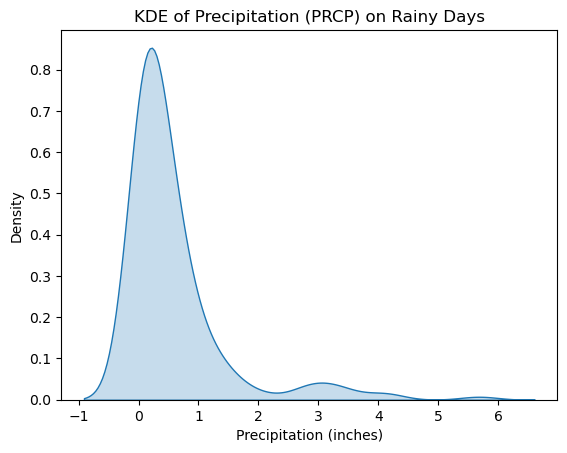

In [ ]:
rainy_days = df[df["rain"] == 1]
sns.kdeplot(rainy_days["PRCP"], fill=True)
plt.title("KDE of Precipitation (PRCP) on Rainy Days")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Density")
plt.show()

One way to improve this model would be to incorporate seasonality into the transition probabilities. Rainfall likelihood in Charlottesville likely varies by month or season, so adjusting the Markov transition matrix dynamically to reflect seasonal patterns (for example, higher rain probability in summer months) would create a more realistic forecast. Including temperature or humidity as additional predictors could also improve accuracy and simulate more complex weather dynamics.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [21]:
taxi = pd.read_pickle("taxicab.pkl")

In [23]:
all_neighborhoods = pd.concat(taxi)
unique_states = all_neighborhoods.unique()
print("Number of unique neighborhoods:", len(unique_states))
print(unique_states)

Number of unique neighborhoods: 38
['Outside Manhattan' 'Central Park' 'Upper East Side' 'Upper West Side'
 'Lower East Side' 'Gramercy' 'Kips Bay' 'Midtown' 'Chelsea'
 'Theater District' 'Financial District' 'Greenwich Village' 'Murray Hill'
 'East Harlem' 'SoHo' "Hell's Kitchen" 'West Village' 'Battery Park City'
 'Flatiron District' 'NoHo' 'Tribeca' 'Chinatown' 'Little Italy'
 'East Village' 'Harlem' 'Washington Heights' 'Nolita' 'Civic Center'
 'Morningside Heights' 'Stuyvesant Town' 'Two Bridges' 'Inwood'
 'Roosevelt Island' "Randall's Island" 'Marble Hill' 'Governors Island'
 'Ellis Island' 'Liberty Island']


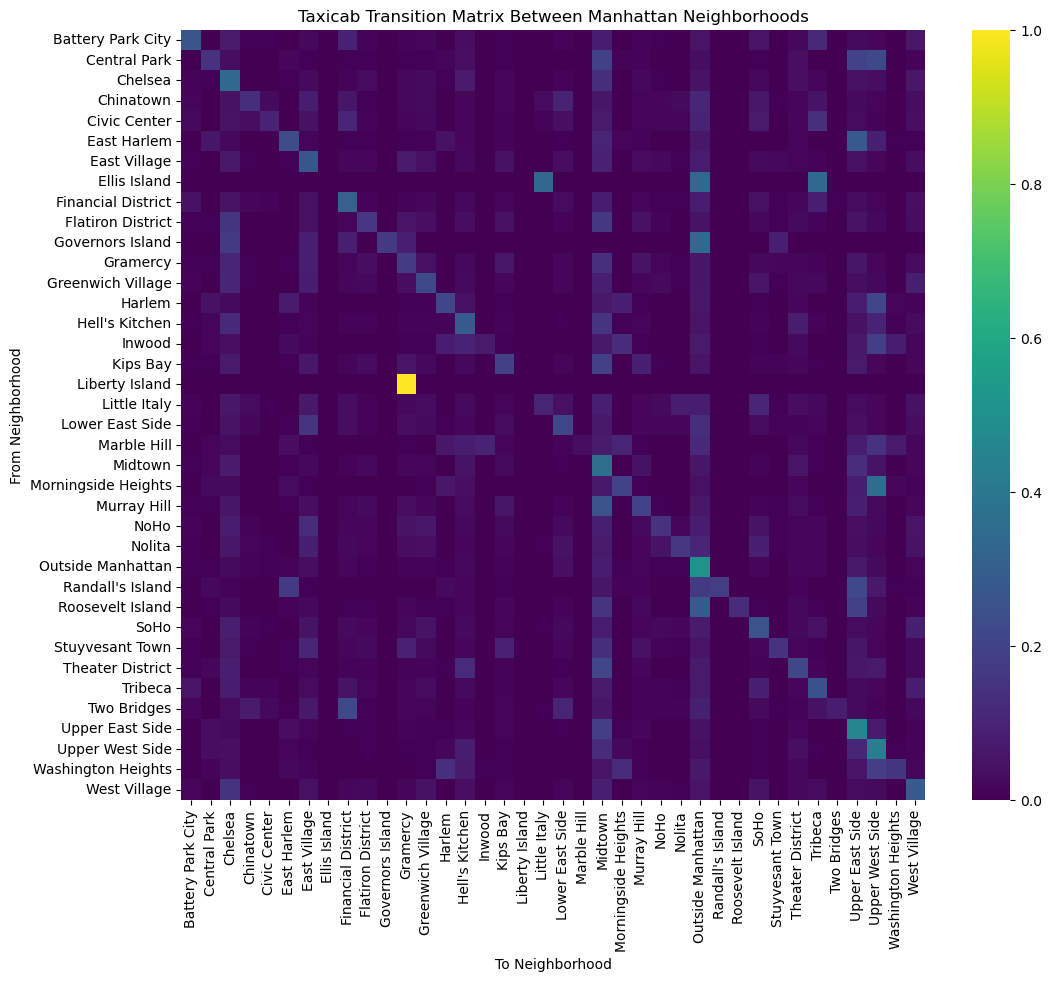

In [ ]:
transitions = []
for trip in taxi:
    transitions += list(zip(trip[:-1], trip[1:]))

transition_df = pd.DataFrame(transitions, columns=["From", "To"])
transition_matrix = pd.crosstab(transition_df["From"], transition_df["To"], normalize="index")

plt.figure(figsize=(12, 10))
sns.heatmap(transition_matrix, cmap="viridis")
plt.title("Taxicab Transition Matrix Between Manhattan Neighborhoods")
plt.xlabel("To Neighborhood")
plt.ylabel("From Neighborhood")
plt.show()

In [26]:
common_routes = transition_df.value_counts().head(10)
print(common_routes)

From               To               
Midtown            Midtown              1389343
Upper East Side    Upper East Side      1283151
Outside Manhattan  Outside Manhattan    1203902
Upper West Side    Upper West Side       763963
Chelsea            Chelsea               662397
Upper East Side    Midtown               507502
Midtown            Upper East Side       484395
Hell's Kitchen     Hell's Kitchen        346322
Midtown            Chelsea               278191
Chelsea            Midtown               260420
Name: count, dtype: int64


The most common taxi routes occur within the same neighborhood, such as Midtown → Midtown, Upper East Side → Upper East Side, and Chelsea → Chelsea, showing that many rides begin and end locally. Cross-neighborhood routes like Midtown → Upper East Side also appear frequently, reflecting short inter-district travel in dense commercial zones.

Taxicabs are most likely order 1 because each trip’s next destination depends only on the current location, not the full sequence of prior stops. This Markov property captures immediate spatial patterns of demand without requiring memory of longer travel histories.

In [27]:
hells_kitchen_index = np.where(unique_states == "Hell's Kitchen")[0][0]

T = transition_matrix.values
n_states = len(unique_states)

state = np.zeros(n_states)
state[hells_kitchen_index] = 1

for steps in [2, 3, 5, 10]:
    forecast = np.linalg.matrix_power(T, steps).T @ state
    top_indices = forecast.argsort()[-5:][::-1]
    print(f"\nAfter {steps} trips:")
    for i in top_indices:
        print(f"{unique_states[i]}: {forecast[i]:.4f}")


After 2 trips:
Governors Island: 0.1931
Chinatown: 0.1214
Marble Hill: 0.1060
Nolita: 0.0830
SoHo: 0.0754

After 3 trips:
Governors Island: 0.1543
Chinatown: 0.1513
Marble Hill: 0.1260
Nolita: 0.0893
Upper East Side: 0.0694

After 5 trips:
Chinatown: 0.1681
Marble Hill: 0.1306
Governors Island: 0.1024
Nolita: 0.0968
Upper East Side: 0.0803

After 10 trips:
Chinatown: 0.1682
Marble Hill: 0.1229
Nolita: 0.1024
Upper East Side: 0.0858
Governors Island: 0.0798


In [28]:
T = transition_matrix.values
n_states = len(unique_states)

# Start from any neighborhood, for example Midtown
midtown_index = np.where(unique_states == "Midtown")[0][0]
state = np.zeros(n_states)
state[midtown_index] = 1

prev_state = np.zeros(n_states)
tolerance = 1e-6
steps = 0

while np.max(np.abs(state - prev_state)) > tolerance:
    prev_state = state.copy()
    state = state @ T
    steps += 1

print(f"Converged after {steps} iterations")
top_indices = state.argsort()[-5:][::-1]
for i in top_indices:
    print(f"{unique_states[i]}: {state[i]:.4f}")


Converged after 23 iterations
Chinatown: 0.1677
Marble Hill: 0.1218
Nolita: 0.1030
Upper East Side: 0.0862
Governors Island: 0.0785


After repeated iterations, the model converged after 23 steps, meaning the distribution of cab locations stabilized. In the long run, taxis spend most of their time in Chinatown, Marble Hill, and Nolita.